### Making a simple plot using `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
z = np.loadtxt('data/04_numpy/mt_st_helens_before.dat')
z2 = np.loadtxt('data/04_numpy/mt_st_helens_after.dat')

#### set masks for no-data values

In [3]:
z = np.ma.masked_array(z, mask=(z==0))
z2 = np.ma.masked_array(z2, mask=(z2==0))
nrow, ncol = z.shape

#### make a plot using the basic pyplot interface

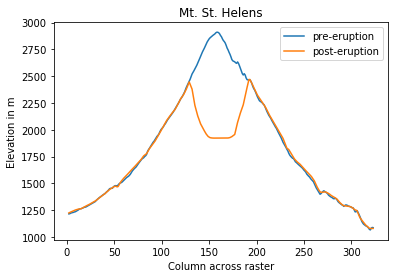

In [4]:
plt.plot(range(0, ncol), z[200, :], label='pre-eruption')
plt.plot(range(0, ncol), z2[200, :], label='post-eruption')
plt.xlabel('Column across raster')
plt.ylabel('Elevation in m')
plt.title('Mt. St. Helens')
plt.legend()
ax = plt.gca()

#### the `AxesSubplot` interface

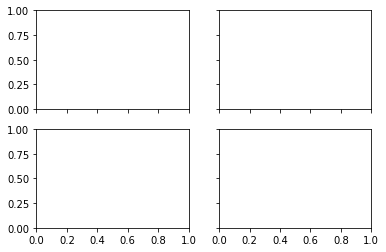

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

In [6]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e7ea9e8>,
      dtype=object)

#### convert x-axis to meters

In [7]:
dist = np.linspace(0, 5*5280*.3048, ncol)
dist

array([   0.        ,   24.68319018,   49.36638037,   74.04957055,
         98.73276074,  123.41595092,  148.0991411 ,  172.78233129,
        197.46552147,  222.14871166,  246.83190184,  271.51509202,
        296.19828221,  320.88147239,  345.56466258,  370.24785276,
        394.93104294,  419.61423313,  444.29742331,  468.9806135 ,
        493.66380368,  518.34699387,  543.03018405,  567.71337423,
        592.39656442,  617.0797546 ,  641.76294479,  666.44613497,
        691.12932515,  715.81251534,  740.49570552,  765.17889571,
        789.86208589,  814.54527607,  839.22846626,  863.91165644,
        888.59484663,  913.27803681,  937.96122699,  962.64441718,
        987.32760736, 1012.01079755, 1036.69398773, 1061.37717791,
       1086.0603681 , 1110.74355828, 1135.42674847, 1160.10993865,
       1184.79312883, 1209.47631902, 1234.1595092 , 1258.84269939,
       1283.52588957, 1308.20907975, 1332.89226994, 1357.57546012,
       1382.25865031, 1406.94184049, 1431.62503067, 1456.30822

#### Make a plot with a specified vertical exaggeration of 2x; save to PDF

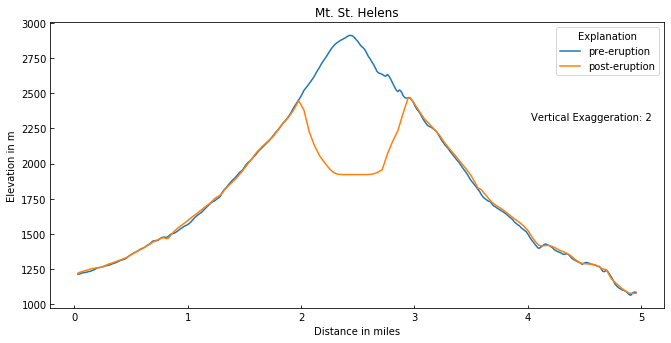

In [8]:
ve = 2
fig, ax = plt.subplots(figsize=(11, 8.5))
ax.plot(dist, z[200, :], label='pre-eruption')
ax.plot(dist, z2[200, :], label='post-eruption')
ax.set_xlabel('Distance in miles')
ax.set_ylabel('Elevation in m')
ax.set_title('Mt. St. Helens')
ax.set_aspect(ve)
ax.text(0.98, .65, 'Vertical Exaggeration: {:.0f}'.format(ve),
        transform=ax.transAxes, ha='right', va='bottom')
xticks = np.arange(0, 6)
ax.set_xticks(xticks*1609.)
ax.set_xticklabels(xticks)
ax.tick_params(direction='in')
ax.legend(title='Explanation')
plt.savefig('mtsthelens.pdf', dpi=300, bbox_inches='tight')

The `plt.rcParams` dictionary can be modified to change default matplotlib settings for the current session. For example, changing the default font to a serif font-type:

In [12]:
sansserif = plt.rcParams['font.family']
#plt.rcParams['font.family'] = 'serif'

Text(0.5, 1.0, 'stuff')

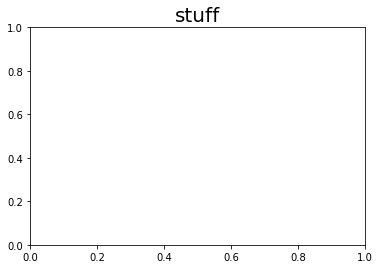

In [13]:
plt.subplots()
plt.title('stuff', fontsize=20)

#### make a meshgrid
of the x and y coorindates of each pixel in the DEM

In [14]:
x = dist
y = np.arange(0, nrow)*x[1]
X, Y = np.meshgrid(x, y)

In [15]:
X.shape, Y.shape

((466, 327), (466, 327))

#### make a pcolormesh overlain with contours

<a list of 36 text.Text objects>

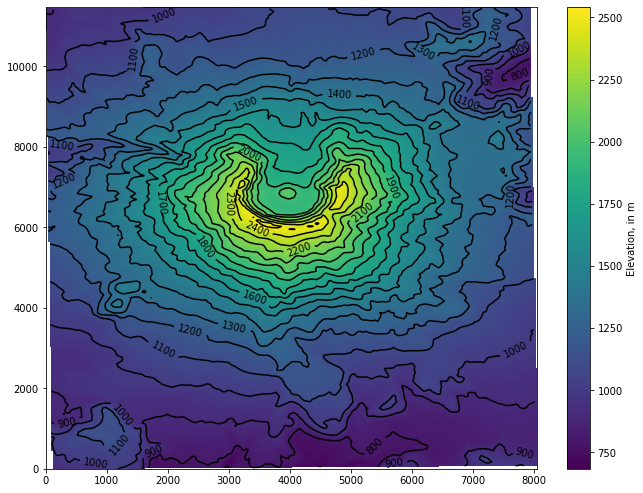

In [16]:
fig, ax = plt.subplots(figsize=(11, 8.5))
cs = ax.contour(X, Y, np.flipud(z2), colors='k', 
           levels=np.arange(700, 3000, 100), zorder=11)
qm = ax.pcolormesh(X, Y, np.flipud(z2), zorder=-1)
cb = plt.colorbar(qm, label='Elevation, in m')
ax.clabel(cs, inline=1, fontsize=10, fmt='%1.0f')